In [3]:
import networkx as nx
#!pip install pyvis

In [27]:
from IPython.display import IFrame

# Tu documento Google Sheets
IFrame("https://docs.google.com/spreadsheets/d/e/2PACX-1vSj-s_vkNgQb0zgICQcazubHeEju2g9sQ16qeRU5XmY35spPF49JrzdX82rXGpLaRpDbWlBfgjybRfi/pubhtml?gid=1202256999&single=true", width=1200, height=350)


In [28]:
import pandas as pd
LinkToData="https://docs.google.com/spreadsheets/d/e/2PACX-1vSj-s_vkNgQb0zgICQcazubHeEju2g9sQ16qeRU5XmY35spPF49JrzdX82rXGpLaRpDbWlBfgjybRfi/pub?gid=1202256999&single=true&output=csv"
SocialesData = pd.read_csv(LinkToData,
                          index_col=0) 

In [29]:
SocialesData.head()

,Rosa Alayza,Jorge Aragon,Eduardo Dargent,Farid Kahhat,Jose Magallanes,Stephanie Rousseau,Martin Tanaka,Fernando Tuesta,Oscar Vidarte,Sebastien Adins,...,Liliana Vargas,Rocio Verastegui,Jose Villaorduña,Jorge Yrivarren,Lady Zegarra,Antonio Zuñiga,Principal,Asociado,Auxiliar,Contratado
Rosa Alayza,1,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,1,1,0,0,0
Jorge Aragon,0,1,0,0,0,0,0,NaN,0,0,...,0,0,0,0,0,0,1,0,0,0
Eduardo Dargent,0,0,1,0,0,1,1,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
Farid Kahhat,0,0,0,1,0,0,0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
Jose Magallanes,0,0,0,0,1,0,0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [30]:
SocialesData = SocialesData.fillna(0).astype(int)
SocialesData.columns = SocialesData.columns.str.strip()
SocialesData.index = SocialesData.index.map(str.strip)

In [31]:
SocialesData.columns

Index(['Rosa Alayza', 'Jorge Aragon', 'Eduardo Dargent', 'Farid Kahhat',
       'Jose Magallanes', 'Stephanie Rousseau', 'Martin Tanaka',
       'Fernando Tuesta', 'Oscar Vidarte', 'Sebastien Adins', 'Flavio Ausejo',
       'Tomas Dosek', 'Gonzalo Gamio', 'Carmen Ilizarbe', 'Arturo Maldonado',
       'Milagros Campos', 'Mayte Dongo', 'Camila Gianella', 'Jorge Abanto',
       'Gonzalo Alcalde', 'Javier Alcalde', 'Juan Arroyo', 'Jorge Arrunategui',
       'Daniel Avalos', 'Omar Awapara', 'Veronica Ayala',
       'Rodrigo Barrenechea', 'Cesar Bazan', 'Cecilia Beltran',
       'Daniele Benzi', 'Carl Blydal', 'Ignacio Cardone', 'Eliana Carlin',
       'Frank Casas', 'Patricia Castro', 'Julissa Castro', 'Julio Chan',
       'Cesar Chaname', 'Christian Chiroque', 'Alvaro Collao',
       'Patricia Concha', 'Beatriz Cordova', 'Omar Coronel', 'Marylia Cruz',
       'Juan Fahsbender', 'Maria Ghanem', 'Rodrigo Gil', 'Jose Godoy',
       'Martin Jaime', 'Cesar Jara', 'Iris Jave', 'Cesar Jimenez',
 

In [32]:
varsToDrop=["Principal","Asociado","Auxiliar","Contratado"]
adjacency=SocialesData.drop(varsToDrop,axis=1)

#result
adjacency

,Rosa Alayza,Jorge Aragon,Eduardo Dargent,Farid Kahhat,Jose Magallanes,Stephanie Rousseau,Martin Tanaka,Fernando Tuesta,Oscar Vidarte,Sebastien Adins,...,Nicolas Terradas,Zarai Toledo,Francesco Tucci,Adriana Urrutia,Liliana Vargas,Rocio Verastegui,Jose Villaorduña,Jorge Yrivarren,Lady Zegarra,Antonio Zuñiga
Rosa Alayza,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Jorge Aragon,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Eduardo Dargent,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Farid Kahhat,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jose Magallanes,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rocio Verastegui,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Jose Villaorduña,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Jorge Yrivarren,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Lady Zegarra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
import networkx as nx
TeachersNet = nx.from_pandas_adjacency(adjacency)

In [34]:
TeachersNet.remove_edges_from(nx.selfloop_edges(TeachersNet))

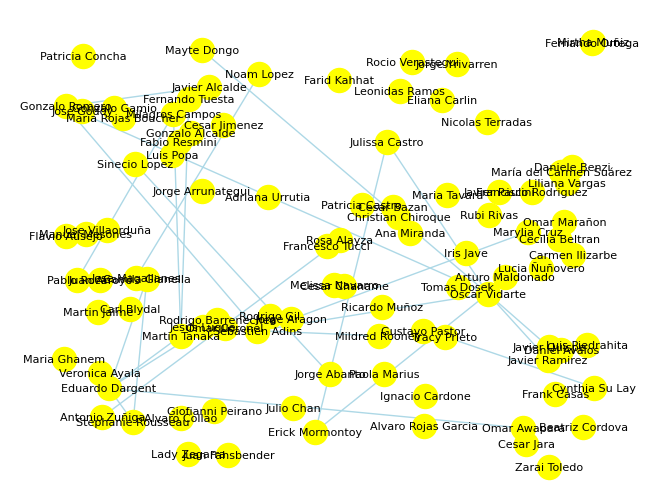

In [35]:
nx.draw_random(TeachersNet,
                node_color='yellow',
                edge_color='lightblue',
                with_labels=True,
                font_size=8)

In [39]:
dict(zip(SocialesData.index,SocialesData['Principal']))
dict(zip(SocialesData.index,SocialesData['Asociado']))
dict(zip(SocialesData.index,SocialesData['Auxiliar']))
dict(zip(SocialesData.index,SocialesData['Contratado']))





{'Rosa Alayza': 0,
 'Jorge Aragon': 0,
 'Eduardo Dargent': 0,
 'Farid Kahhat': 0,
 'Jose Magallanes': 0,
 'Stephanie Rousseau': 0,
 'Martin Tanaka': 0,
 'Fernando Tuesta': 0,
 'Oscar Vidarte': 0,
 'Sebastien Adins': 0,
 'Flavio Ausejo': 0,
 'Tomas Dosek': 0,
 'Gonzalo Gamio': 0,
 'Carmen Ilizarbe': 0,
 'Arturo Maldonado': 0,
 'Milagros Campos': 0,
 'Mayte Dongo': 0,
 'Camila Gianella': 0,
 'Jorge Abanto': 1,
 'Gonzalo Alcalde': 1,
 'Javier Alcalde': 1,
 'Juan Arroyo': 1,
 'Jorge Arrunategui': 1,
 'Daniel Avalos': 1,
 'Omar Awapara': 1,
 'Veronica Ayala': 1,
 'Rodrigo Barrenechea': 1,
 'Cesar Bazan': 1,
 'Cecilia Beltran': 1,
 'Daniele Benzi': 1,
 'Carl Blydal': 1,
 'Ignacio Cardone': 1,
 'Eliana Carlin': 1,
 'Frank Casas': 1,
 'Patricia Castro': 1,
 'Julissa Castro': 1,
 'Julio Chan': 1,
 'Cesar Chaname': 1,
 'Christian Chiroque': 1,
 'Alvaro Collao': 1,
 'Patricia Concha': 1,
 'Beatriz Cordova': 1,
 'Omar Coronel': 1,
 'Marylia Cruz': 1,
 'Juan Fahsbender': 1,
 'Maria Ghanem': 1,
 'Ro

In [40]:
attributeToAdd_1=dict(zip(SocialesData.index,SocialesData['Principal']))
attributeToAdd_2=dict(zip(SocialesData.index,SocialesData['Asociado']))
attributeToAdd_3=dict(zip(SocialesData.index,SocialesData['Auxiliar']))
attributeToAdd_4=dict(zip(SocialesData.index,SocialesData['Contratado']))

nx.set_node_attributes(TeachersNet, attributeToAdd_1, 'Principal')
nx.set_node_attributes(TeachersNet, attributeToAdd_2, 'Asociado')
nx.set_node_attributes(TeachersNet, attributeToAdd_3, 'Auxiliar')
nx.set_node_attributes(TeachersNet, attributeToAdd_4, 'Contratado')

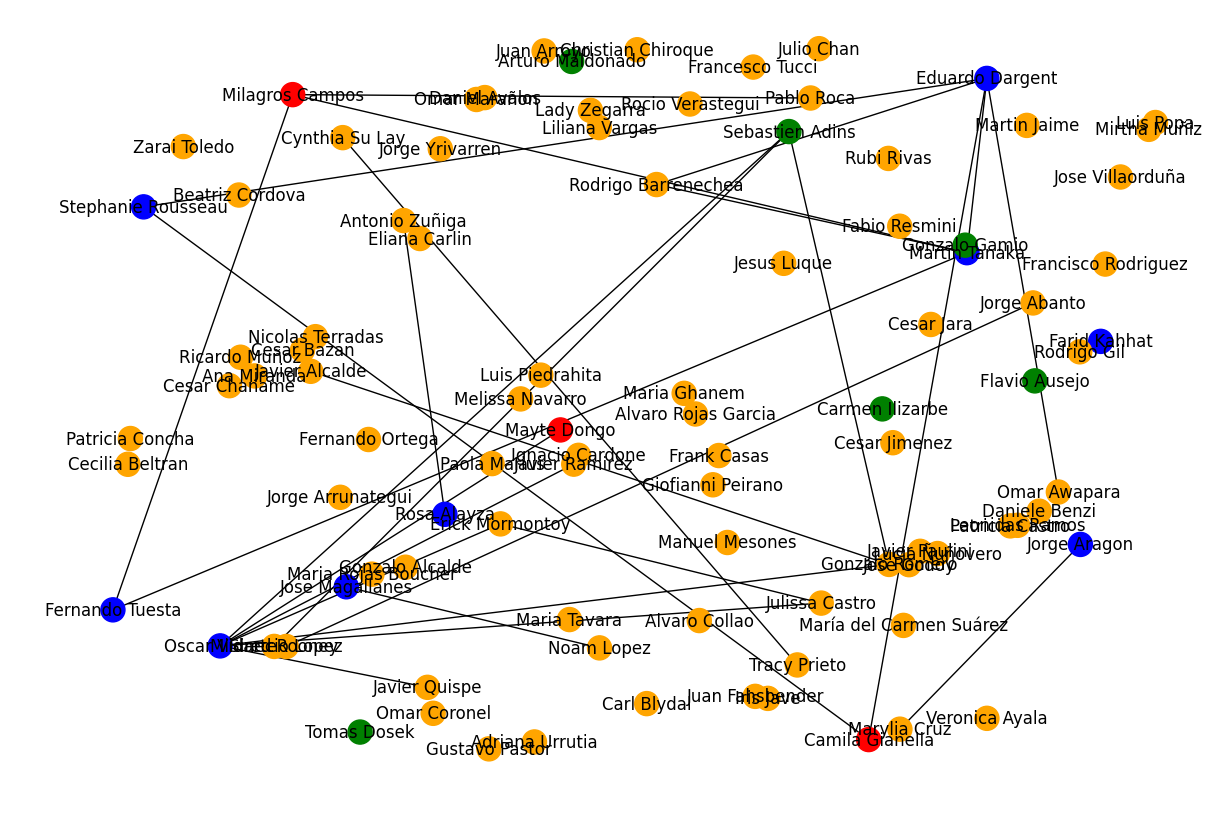

In [44]:
# Asumiendo que 'TeachersNet' es tu red y que 'SocialesData' contiene las categorías correctas para cada nodo.
# Definir colores para cada categoría
colors = {
    node: ('blue' if data.get('Principal', 0) == 1 else
           'green' if data.get('Asociado', 0) == 1 else
           'red' if data.get('Auxiliar', 0) == 1 else
           'orange' if data.get('Contratado', 0) == 1 else
           'grey')  # 'grey' como color por defecto
    for node, data in TeachersNet.nodes(data=True)
}

# Asignar el atributo de color a cada nodo en la red
nx.set_node_attributes(TeachersNet, colors, 'color')

# Dibujar la red con los colores asignados
plt.figure(figsize=(12, 8))
nx.draw_random(TeachersNet, node_color=[data['color'] for node, data in TeachersNet.nodes(data=True)], with_labels=True)
plt.show()


In [48]:
len(list(nx.connected_components(TeachersNet)))

73

In [50]:
list(nx.isolates(TeachersNet))

['Farid Kahhat',
 'Flavio Ausejo',
 'Tomas Dosek',
 'Gonzalo Gamio',
 'Carmen Ilizarbe',
 'Arturo Maldonado',
 'Gonzalo Alcalde',
 'Juan Arroyo',
 'Jorge Arrunategui',
 'Daniel Avalos',
 'Veronica Ayala',
 'Cesar Bazan',
 'Cecilia Beltran',
 'Daniele Benzi',
 'Carl Blydal',
 'Ignacio Cardone',
 'Eliana Carlin',
 'Frank Casas',
 'Patricia Castro',
 'Julio Chan',
 'Cesar Chaname',
 'Christian Chiroque',
 'Alvaro Collao',
 'Patricia Concha',
 'Beatriz Cordova',
 'Omar Coronel',
 'Juan Fahsbender',
 'Maria Ghanem',
 'Rodrigo Gil',
 'Jose Godoy',
 'Martin Jaime',
 'Cesar Jara',
 'Iris Jave',
 'Cesar Jimenez',
 'Jesus Luque',
 'Omar Marañon',
 'Paola Marius',
 'Manuel Mesones',
 'Ana Miranda',
 'Mirtha Muñiz',
 'Ricardo Muñoz',
 'Melissa Navarro',
 'Lucia Ñuñovero',
 'Fernando Ortega',
 'Gustavo Pastor',
 'Javier Paulini',
 'Giofianni Peirano',
 'Luis Piedrahita',
 'Luis Popa',
 'Leonidas Ramos',
 'Fabio Resmini',
 'Rubi Rivas',
 'Francisco Rodriguez',
 'Alvaro Rojas Garcia',
 'Maria Rojas B

In [52]:
#just for the largest component
largest_cc_nodes = max(nx.connected_components(TeachersNet), key=len)
TeachersNet_largest=TeachersNet.subgraph(largest_cc_nodes)

nx.diameter(TeachersNet_largest)

3

In [53]:
# geodesics
geodesics = dict(nx.all_pairs_shortest_path_length(TeachersNet))

# as matrix
MatrixGeo = [[geodesics.get(n,{}).get(m)  for m in TeachersNet.nodes] for n in TeachersNet.nodes]

# as DF (pandas)
MatrixGeo_DF=pd.DataFrame(MatrixGeo,index=TeachersNet.nodes, columns=TeachersNet.nodes)

# we get
MatrixGeo_DF

,Rosa Alayza,Jorge Aragon,Eduardo Dargent,Farid Kahhat,Jose Magallanes,Stephanie Rousseau,Martin Tanaka,Fernando Tuesta,Oscar Vidarte,Sebastien Adins,...,Nicolas Terradas,Zarai Toledo,Francesco Tucci,Adriana Urrutia,Liliana Vargas,Rocio Verastegui,Jose Villaorduña,Jorge Yrivarren,Lady Zegarra,Antonio Zuñiga
Rosa Alayza,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Jorge Aragon,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Eduardo Dargent,NaN,NaN,0.0,NaN,NaN,1.0,1.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Farid Kahhat,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jose Magallanes,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rocio Verastegui,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
Jose Villaorduña,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
Jorge Yrivarren,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
Lady Zegarra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [54]:
import numpy as np

pd.DataFrame(np.unique(MatrixGeo_DF.values, return_counts=True),index=['valor','freq']).T.set_index('valor')

,freq
valor,
0.0,95.0
1.0,54.0
2.0,74.0
3.0,38.0
4.0,6.0
NaN,8758.0


In [55]:
MatrixReach_DF=(MatrixGeo_DF>0).replace({True:1,False:0})
MatrixReach_DF

C:\Users\Nicolas Silva\AppData\Local\Temp\ipykernel_26724\3592291340.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MatrixReach_DF=(MatrixGeo_DF>0).replace({True:1,False:0})


,Rosa Alayza,Jorge Aragon,Eduardo Dargent,Farid Kahhat,Jose Magallanes,Stephanie Rousseau,Martin Tanaka,Fernando Tuesta,Oscar Vidarte,Sebastien Adins,...,Nicolas Terradas,Zarai Toledo,Francesco Tucci,Adriana Urrutia,Liliana Vargas,Rocio Verastegui,Jose Villaorduña,Jorge Yrivarren,Lady Zegarra,Antonio Zuñiga
Rosa Alayza,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Jorge Aragon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Eduardo Dargent,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Farid Kahhat,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jose Magallanes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rocio Verastegui,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jose Villaorduña,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jorge Yrivarren,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lady Zegarra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# connectedness
nNodes=len(TeachersNet.nodes)
MatrixReach_DF.sum().sum()/(nNodes*(nNodes-1))

np.float64(0.019260918253079507)

In [57]:
# geodesics
geodesics_Lcc = dict(nx.all_pairs_shortest_path_length(TeachersNet_largest))

# as matrix
MatrixGeo_Lcc = [[geodesics_Lcc.get(n,{}).get(m)  for m in TeachersNet_largest.nodes] for n in TeachersNet_largest.nodes]

# as DF (pandas)
MatrixGeo_DF_Lcc=pd.DataFrame(MatrixGeo_Lcc,index=TeachersNet_largest.nodes, columns=TeachersNet_largest.nodes)

# we get
MatrixGeo_DF_Lcc

,Javier Ramirez,Gonzalo Romero,Julissa Castro,Sebastien Adins,Mildred Rooney,Oscar Vidarte,Javier Quispe,Javier Alcalde,Mayte Dongo,Erick Mormontoy
Javier Ramirez,0,2,2,2,3,1,2,3,2,2
Gonzalo Romero,2,0,2,1,2,1,2,1,2,2
Julissa Castro,2,2,0,2,3,1,2,3,2,1
Sebastien Adins,2,1,2,0,1,1,2,2,2,2
Mildred Rooney,3,2,3,1,0,2,3,3,3,3
Oscar Vidarte,1,1,1,1,2,0,1,2,1,1
Javier Quispe,2,2,2,2,3,1,0,3,2,2
Javier Alcalde,3,1,3,2,3,2,3,0,3,3
Mayte Dongo,2,2,2,2,3,1,2,3,0,2
Erick Mormontoy,2,2,1,2,3,1,2,3,2,0


In [58]:
MatrixReach_DF_Lcc=(MatrixGeo_DF_Lcc>0).replace({True:1,False:0})
MatrixReach_DF_Lcc

C:\Users\Nicolas Silva\AppData\Local\Temp\ipykernel_26724\1148812125.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MatrixReach_DF_Lcc=(MatrixGeo_DF_Lcc>0).replace({True:1,False:0})


,Javier Ramirez,Gonzalo Romero,Julissa Castro,Sebastien Adins,Mildred Rooney,Oscar Vidarte,Javier Quispe,Javier Alcalde,Mayte Dongo,Erick Mormontoy
Javier Ramirez,0,1,1,1,1,1,1,1,1,1
Gonzalo Romero,1,0,1,1,1,1,1,1,1,1
Julissa Castro,1,1,0,1,1,1,1,1,1,1
Sebastien Adins,1,1,1,0,1,1,1,1,1,1
Mildred Rooney,1,1,1,1,0,1,1,1,1,1
Oscar Vidarte,1,1,1,1,1,0,1,1,1,1
Javier Quispe,1,1,1,1,1,1,0,1,1,1
Javier Alcalde,1,1,1,1,1,1,1,0,1,1
Mayte Dongo,1,1,1,1,1,1,1,1,0,1
Erick Mormontoy,1,1,1,1,1,1,1,1,1,0


In [60]:
nNodes=len(TeachersNet_largest.nodes)
MatrixReach_DF_Lcc.sum().sum()/(nNodes*(nNodes-1))

np.float64(1.0)

In [61]:
nx.density(TeachersNet_largest)

0.24444444444444444

In [62]:
actorMeasures=pd.concat([pd.DataFrame.from_dict(nx.degree_centrality(TeachersNet_largest),
                                  orient='index',
                                  columns=['Degree']),
           pd.DataFrame.from_dict(nx.closeness_centrality(TeachersNet_largest),
                                  orient='index',
                                  columns=['Closeness']),
           pd.DataFrame.from_dict(nx.betweenness_centrality(TeachersNet_largest),
                                  orient='index',
                                  columns=['Betweenness'])],axis=1)
## data
actorMeasures

,Degree,Closeness,Betweenness
Javier Ramirez,0.111111,0.473684,0.000000
Gonzalo Romero,0.333333,0.600000,0.222222
Julissa Castro,0.222222,0.500000,0.000000
Sebastien Adins,0.333333,0.600000,0.222222
Mildred Rooney,0.111111,0.391304,0.000000
Oscar Vidarte,0.777778,0.818182,0.805556
Javier Quispe,0.111111,0.473684,0.000000
Javier Alcalde,0.111111,0.391304,0.000000
Mayte Dongo,0.111111,0.473684,0.000000
Erick Mormontoy,0.222222,0.500000,0.000000


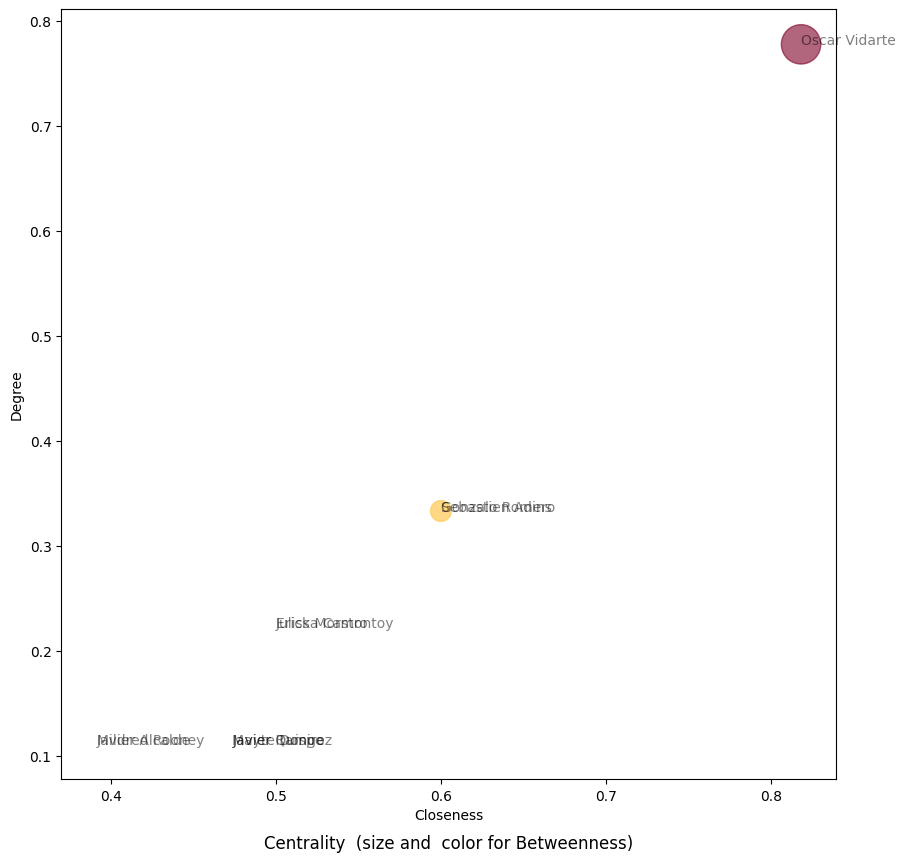

In [63]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(actorMeasures.Closeness, actorMeasures.Degree,s=1000*actorMeasures.Betweenness,
           c=100*actorMeasures.Betweenness,
           cmap=plt.get_cmap('YlOrRd'), alpha=0.6)

valsForAnnotate=zip(actorMeasures.index,actorMeasures.Closeness,actorMeasures.Degree)
for name,coordX,coordY in valsForAnnotate:
    ax.annotate(name, (coordX,coordY),alpha=0.5)

plt.title("Centrality  (size and  color for Betweenness)", y=-0.1)
plt.xlabel("Closeness")
plt.ylabel("Degree")
plt.show()